## Principal Component Analysis 

In [1]:
# Import numpy 
import numpy as np

# Import linear algebra module
from scipy import linalg as la
 
# Create dataset
data=np.array([[7., 4., 3.],
               [4., 1., 8.],
               [6., 3., 5.],
               [8., 6., 1.],
               [8., 5., 7.],
               [7., 2., 9.],
               [5., 3., 3.],
               [9., 5., 8.],
               [7., 4., 5.],
               [8., 2., 2.]])
 
# 1. Calculate the covariance matrix
# Center your data
data -= data.mean(axis=0)
cov = np.cov(data, rowvar=False)
 
# 2. Calculate  eigenvalues and eigenvector of the covariance matrix
evals, evecs = la.eig(cov)
print("Eigenvalues:", evals)
print("Eigenvector:", evecs)
 
# 3. Multiply the original data matrix with Eigenvector matrix. 
# Sort the Eigen values and vector and select components
num_components=2
sorted_key = np.argsort(evals)[::-1][:num_components]
evals, evecs = evals[sorted_key], evecs[:, sorted_key]
print("Sorted and Selected Eigen Values:", evals)
print("Sorted and Selected Eigen Vector:", evecs)
 
# Multiply original data and Eigen vector
principal_components=np.dot(data,evecs)
print("Principal Components:", principal_components)

Eigenvalues: [0.74992815+0.j 3.67612927+0.j 8.27394258+0.j]
Eigenvector: [[-0.70172743  0.69903712 -0.1375708 ]
 [ 0.70745703  0.66088917 -0.25045969]
 [ 0.08416157  0.27307986  0.95830278]]
Sorted and Selected Eigen Values: [8.27394258+0.j 3.67612927+0.j]
Sorted and Selected Eigen Vector: [[-0.1375708   0.69903712]
 [-0.25045969  0.66088917]
 [ 0.95830278  0.27307986]]
Principal Components: [[-2.15142276 -0.17311941]
 [ 3.80418259 -2.88749898]
 [ 0.15321328 -0.98688598]
 [-4.7065185   1.30153634]
 [ 1.29375788  2.27912632]
 [ 4.0993133   0.1435814 ]
 [-1.62582148 -2.23208282]
 [ 2.11448986  3.2512433 ]
 [-0.2348172   0.37304031]
 [-2.74637697 -1.06894049]]


In [2]:
# Import pandas and PCA
import pandas as pd

# Import principal component analysis
from sklearn.decomposition import PCA
 
# Create dataset
data=np.array([[7., 4., 3.],
               [4., 1., 8.],
               [6., 3., 5.],
               [8., 6., 1.],
               [8., 5., 7.],
               [7., 2., 9.],
               [5., 3., 3.],
               [9., 5., 8.],
               [7., 4., 5.],
               [8., 2., 2.]])
 
# Create and fit PCA Model
pca_model = PCA(n_components=2)
components = pca_model.fit_transform(data)
 
components_df = pd.DataFrame(data = components, 
                                       columns = ['principal_component_1', 'principal_component_2'])
print(components_df)

   principal_component_1  principal_component_2
0               2.151423              -0.173119
1              -3.804183              -2.887499
2              -0.153213              -0.986886
3               4.706518               1.301536
4              -1.293758               2.279126
5              -4.099313               0.143581
6               1.625821              -2.232083
7              -2.114490               3.251243
8               0.234817               0.373040
9               2.746377              -1.068940


## Finding Number of Clusters

### The Elbow Method

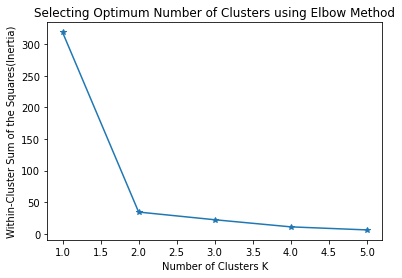

In [3]:
# import pandas
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# import K-means 
from sklearn.cluster import KMeans
 
# Create a DataFrame
data=pd.DataFrame({"X":[12,15,18,10,8,9,12,20],
             "Y":[6,16,17,8,7,6,9,18]})
 
wcss_list = []
# Run a loop for different value of number of cluster
for i in range(1, 6):
    # Create and fit the KMeans model
    kmeans_model = KMeans(n_clusters = i, random_state = 123)
    kmeans_model.fit(data)
    # Add the WCSS or inertia of the clusters to the score_list
    wcss_list.append(kmeans_model.inertia_)

# Plot the inertia(WCSS) and number of clusters    
plt.plot(range(1, 6), wcss_list,  marker='*')
# set title of the plot
plt.title('Selecting Optimum Number of Clusters using Elbow Method')
# Set x-axis label
plt.xlabel('Number of Clusters K')
# Set y-axis label
plt.ylabel('Within-Cluster Sum of the Squares(Inertia)')
# Display plot
plt.show()

### Silhouette Method

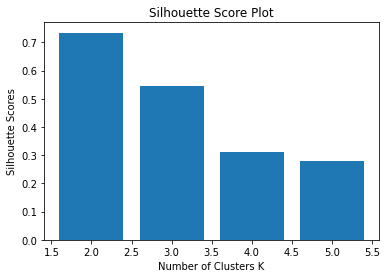

In [4]:
# import pandas 
import pandas as pd

# import matplotlib for data visualization
import matplotlib.pyplot as plt

# import k-means for performing clustering
from sklearn.cluster import KMeans

# import silhouette score
from sklearn.metrics import silhouette_score
 
# Create a DataFrame
data=pd.DataFrame({"X":[12,15,18,10,8,9,12,20],
             "Y":[6,16,17,8,7,6,9,18]})
 
score_list = []

# Run a loop for different value of number of cluster
for i in range(2, 6):
    # Create and fit the KMeans model
    kmeans_model = KMeans(n_clusters = i, random_state = 123)
    kmeans_model.fit(data)
    
    # Make predictions
    pred=kmeans_model.predict(data)
    
    # Calculate the Silhouette Score
    score = silhouette_score (data, pred, metric='euclidean')
    
    # Add the Silhouette score of the clusters to the score_list
    score_list.append(score)
    
# Plot the Silhouette score and number of cluster    
plt.bar(range(2, 6), score_list)
# Set title of the plot 
plt.title('Silhouette Score Plot')
# Set x-axis label
plt.xlabel('Number of Clusters K')
# Set y-axis label
plt.ylabel('Silhouette Scores')
# Display plot
plt.show()

## K-Means Clustering

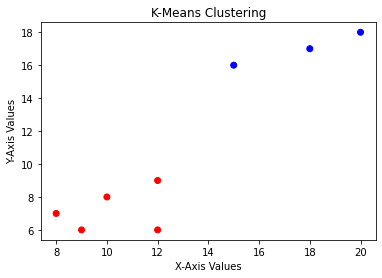

In [5]:
# import pandas 
import pandas as pd

# import matplotlib for data visualization
import matplotlib.pyplot as plt

# Import K-means
from sklearn.cluster import KMeans

# Create a DataFrame
data=pd.DataFrame({"X":[12,15,18,10,8,9,12,20],
             "Y":[6,16,17,8,7,6,9,18]})
 
# Define number of clusters
num_clusters = 2
 
# Create and fit the KMeans model
km = KMeans(n_clusters=num_clusters)
km.fit(data)
 
# Predict the target variable
pred=km.predict(data)
 
# Plot the Clusters
plt.scatter(data.X,data.Y,c=pred, marker="o", cmap="bwr_r")
# Set title of the plot 
plt.title('K-Means Clustering')
# Set x-axis label
plt.xlabel('X-Axis Values')
# Set y-axis label
plt.ylabel('Y-Axis Values')
# Display the plot
plt.show()

## Hierarchical Clustering

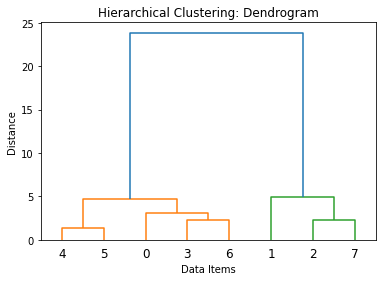

In [6]:
# import pandas 
import pandas as pd

# import matplotlib for data visualization
import matplotlib.pyplot as plt

# Import dendrogram
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
 
# Create a DataFrame
data=pd.DataFrame({"X":[12,15,18,10,8,9,12,20],
             "Y":[6,16,17,8,7,6,9,18]})

# create dendrogram using ward linkage
dendrogram_plot = dendrogram(linkage(data, method = 'ward'))

# Set title of the plot
plt.title('Hierarchical Clustering: Dendrogram')

# Set x-axis label
plt.xlabel('Data Items')

# Set y-axis label
plt.ylabel('Distance')

# Display the plot
plt.show()

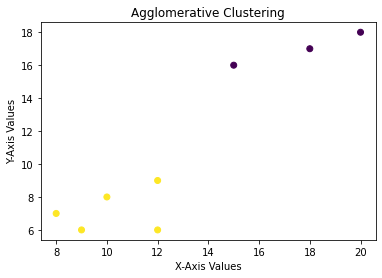

In [7]:
# import pandas 
import pandas as pd

# import matplotlib for data visualization
import matplotlib.pyplot as plt

# Import Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
 
# Create a DataFrame
data=pd.DataFrame({"X":[12,15,18,10,8,9,12,20],
             "Y":[6,16,17,8,7,6,9,18]})
 
# Specify number of clusters
num_clusters = 2
 
# Create agglomerative clustering model
ac = AgglomerativeClustering(n_clusters = num_clusters, linkage='ward')
 
# Fit the Agglomerative Clustering model
ac.fit(data)
 
# Predict the target variable
pred=ac.labels_
 
# Plot the Clusters
plt.scatter(data.X,data.Y,c=pred, marker="o")

# Set title of the plot 
plt.title('Agglomerative Clustering')
# Set x-axis label
plt.xlabel('X-Axis Values')
# Set y-axis label
plt.ylabel('Y-Axis Values')
# Display the plot
plt.show()


## DBSCAN Clustering

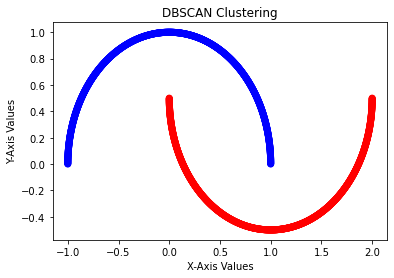

In [8]:
# import pandas 
import pandas as pd

# import matplotlib for data visualization
import matplotlib.pyplot as plt

# Import DBSCAN clustering model
from sklearn.cluster import DBSCAN

# import make_moons dataset
from sklearn.datasets import make_moons
 
# Generate some random moon data
features, label = make_moons(n_samples = 2000)
 
# Create DBSCAN clustering model
db = DBSCAN()
 
# Fit the Spectral Clustering model
db.fit(features)
 
# Predict the target variable
pred_label=db.labels_
 
# Plot the Clusters
plt.scatter(features[:, 0], features[:, 1], c=pred_label, marker="o",cmap="bwr_r")
# Set title of the plot
plt.title('DBSCAN Clustering')
# Set x-axis label
plt.xlabel('X-Axis Values')
# Set y-axis label
plt.ylabel('Y-Axis Values')
# Display the plot
plt.show()

## Spectral Clustering

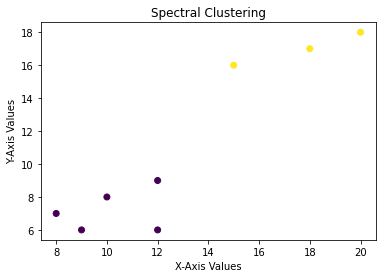

In [9]:
# import pandas 
import pandas as pd

# import matplotlib for data visualization
import matplotlib.pyplot as plt

# Import Spectral Clustering
from sklearn.cluster import SpectralClustering
 
# Create a DataFrame
data=pd.DataFrame({"X":[12,15,18,10,8,9,12,20],
             "Y":[6,16,17,8,7,6,9,18]})
 
# Specify number of clusters
num_clusters = 2
 
# Create Spectral Clustering model
sc=SpectralClustering(num_clusters, affinity='rbf', n_init=100, assign_labels='discretize')
 
# Fit the Spectral Clustering model
sc.fit(data)
 
# Predict the target variable
pred=sc.labels_
 
# Plot the Clusters
plt.scatter(data.X,data.Y,c=pred, marker="o")
# Set title of the plot
plt.title('Spectral Clustering')
# Set x-axis label
plt.xlabel('X-Axis Values')
# Set y-axis label
plt.ylabel('Y-Axis Values')
# Display the plot
plt.show()

## Cluster Performance Evaluation

In [10]:
# Import libraries
import pandas as pd
 
# read the dataset
diabetes = pd.read_csv("diabetes.csv")
 
    
# Show top 5-records
diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
# split dataset in two parts: feature set and target label 
feature_set = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
features = diabetes[feature_set] 
target = diabetes.label
 
# partition data into training and testing set 
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=1)

In [13]:
# Import K-means Clustering
from sklearn.cluster import KMeans

# Import metrics module for performance evaluation
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import fowlkes_mallows_score
 
# Specify the number of clusters
num_clusters = 2
 
# Create and fit the KMeans model
km = KMeans(n_clusters=num_clusters)
km.fit(feature_train)
 
# Predict the target variable
predictions=km.predict(feature_test)
 
# Calculate internal performance evaluation measures
print("Davies-Bouldin Index:", davies_bouldin_score(feature_test, predictions))
print("Silhouette Coefficient:", silhouette_score(feature_test, predictions))

# Calculate External performance evaluation measures
print("Adjusted Rand Score:", adjusted_rand_score(target_test, predictions))
print("Jaccard Score:", jaccard_score(target_test, predictions))
print("F-Measure(F1-Score):", f1_score(target_test, predictions))
print("Fowlkes Mallows Score:", fowlkes_mallows_score(target_test, predictions))

Davies-Bouldin Index: 0.7916877512521092
Silhouette Coefficient: 0.5365443098840619
Adjusted Rand Score: 0.03789319261940484
Jaccard Score: 0.29411764705882354
F-Measure(F1-Score): 0.4545454545454546
Fowlkes Mallows Score: 0.6041244457314743
